In [1]:
import requests

response = requests.get("https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_POL_0.json")
data = response.text

In [2]:
import json
js = json.loads(data)

In [14]:
coords_list = js.get("features")[0].get("geometry").get("coordinates")
main_land_coords = coords_list[0][0]
[x, y] = list(map(list, zip(*main_land_coords)))

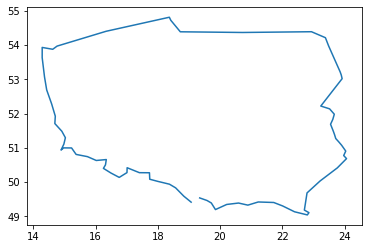

In [15]:
import matplotlib.pyplot as plt

plt.plot(x[::60], y[::60])

In [16]:
def getCountryCoodrs(link, smoothnest_rate = 60):
    import requests

    response = requests.get(link)
    data = response.text

    import json
    js = json.loads(data)

    coordinates = js.get("features")[0].get("geometry").get("coordinates")
    main_land_coords = coordinates[0][0]
    [x, y] = list(map(list, zip(*main_land_coords))) #transposition

    return [x[::smoothnest_rate], y[::smoothnest_rate]]

In [23]:
[x_ua, y_ua] = getCountryCoodrs("https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_POL_0.json", 10)
[x_pl, y_pl] = getCountryCoodrs("https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_UKR_0.json", 10)

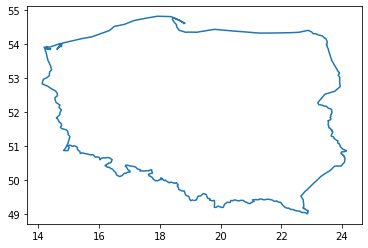

In [24]:
plt.plot(x_ua, y_ua)

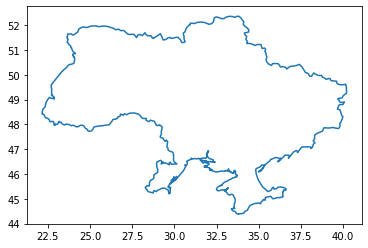

In [25]:
plt.plot(x_pl, y_pl)